In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import json
import nltk

from sqlite3 import Error as SQLError
from datetime import datetime
from language_change_methods.word_clouds import draw_2way_venn_wordcloud, draw_3way_venn_wordcloud

from language_change_methods.utility_functions import clean_text, spacy_tokenise

In [2]:
import sys
sys.path.insert(1, "../")

from settings import DB_FP

out_dir = "./Graphs"

In [3]:
sql_get_all_posts ="""
SELECT c.uid, m.name, p.party, d.date, c.body, c.topic, c.section, s.tmay_deal, s.benn_act, s.ref_stance, s.constituency_leave
FROM contributions as c
INNER JOIN members as m
ON m.PimsId = c.member
INNER JOIN debates as d
ON d.uid = c.debate
INNER JOIN member_party as p
ON p.PimsId = m.PimsId
INNER JOIN member_stances as s
ON s.PimsId = m.PimsId
WHERE (d.date BETWEEN date("2015-05-01") AND date("2019-09-10"))
AND (((d.date BETWEEN p.start AND p.end) AND NOT (p.end IS NULL))
OR ((d.date >= p.start) AND (p.end IS NULL)));""".strip()

# regex for identifying EU/brexit mentions
eu_regex = r'\b(EU|[Ee]uropean [Uu]nion|[Bb]rexit)\b'

In [4]:
conn = sqlite3.connect(DB_FP)
curs = conn.cursor()

In [5]:
%%time

# Gets all the contributions and creates a nice dataframe
all_contributions = pd.read_sql_query(sql_get_all_posts, conn)
all_contributions.columns = ['uid', 'name', 'party', 'date', 'text', 'topic', 'section', 'tmay_deal', 'benn_act', 'ref_stance', 'constituency_leave']
all_contributions.set_index("uid", inplace=True)
convert_to_date = lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S")
all_contributions['date'] = all_contributions['date'].apply(convert_to_date)

Wall time: 15.4 s


In [6]:
%%time
# regex for identifying EU/brexit mentions
eu_regex = r'\b(EU|[Ee]uropean [Uu]nion|[Bb]rexit)\b'

# Returns true if a text matches the eu regex.
check_if_eu = lambda x: True if re.search(eu_regex, x) is not None else False

# Gets dataframe of all contributions mentioning the EU.
eu_mentions = all_contributions.loc[all_contributions.text.apply(check_if_eu)]

Wall time: 4.77 s


In [7]:
with open("../resources/group-kw-static.json", encoding="utf8") as info_file:
    group_kw = json.load(info_file)

group_kw = {gname: pd.Series(group_kw[gname]) for gname in group_kw}

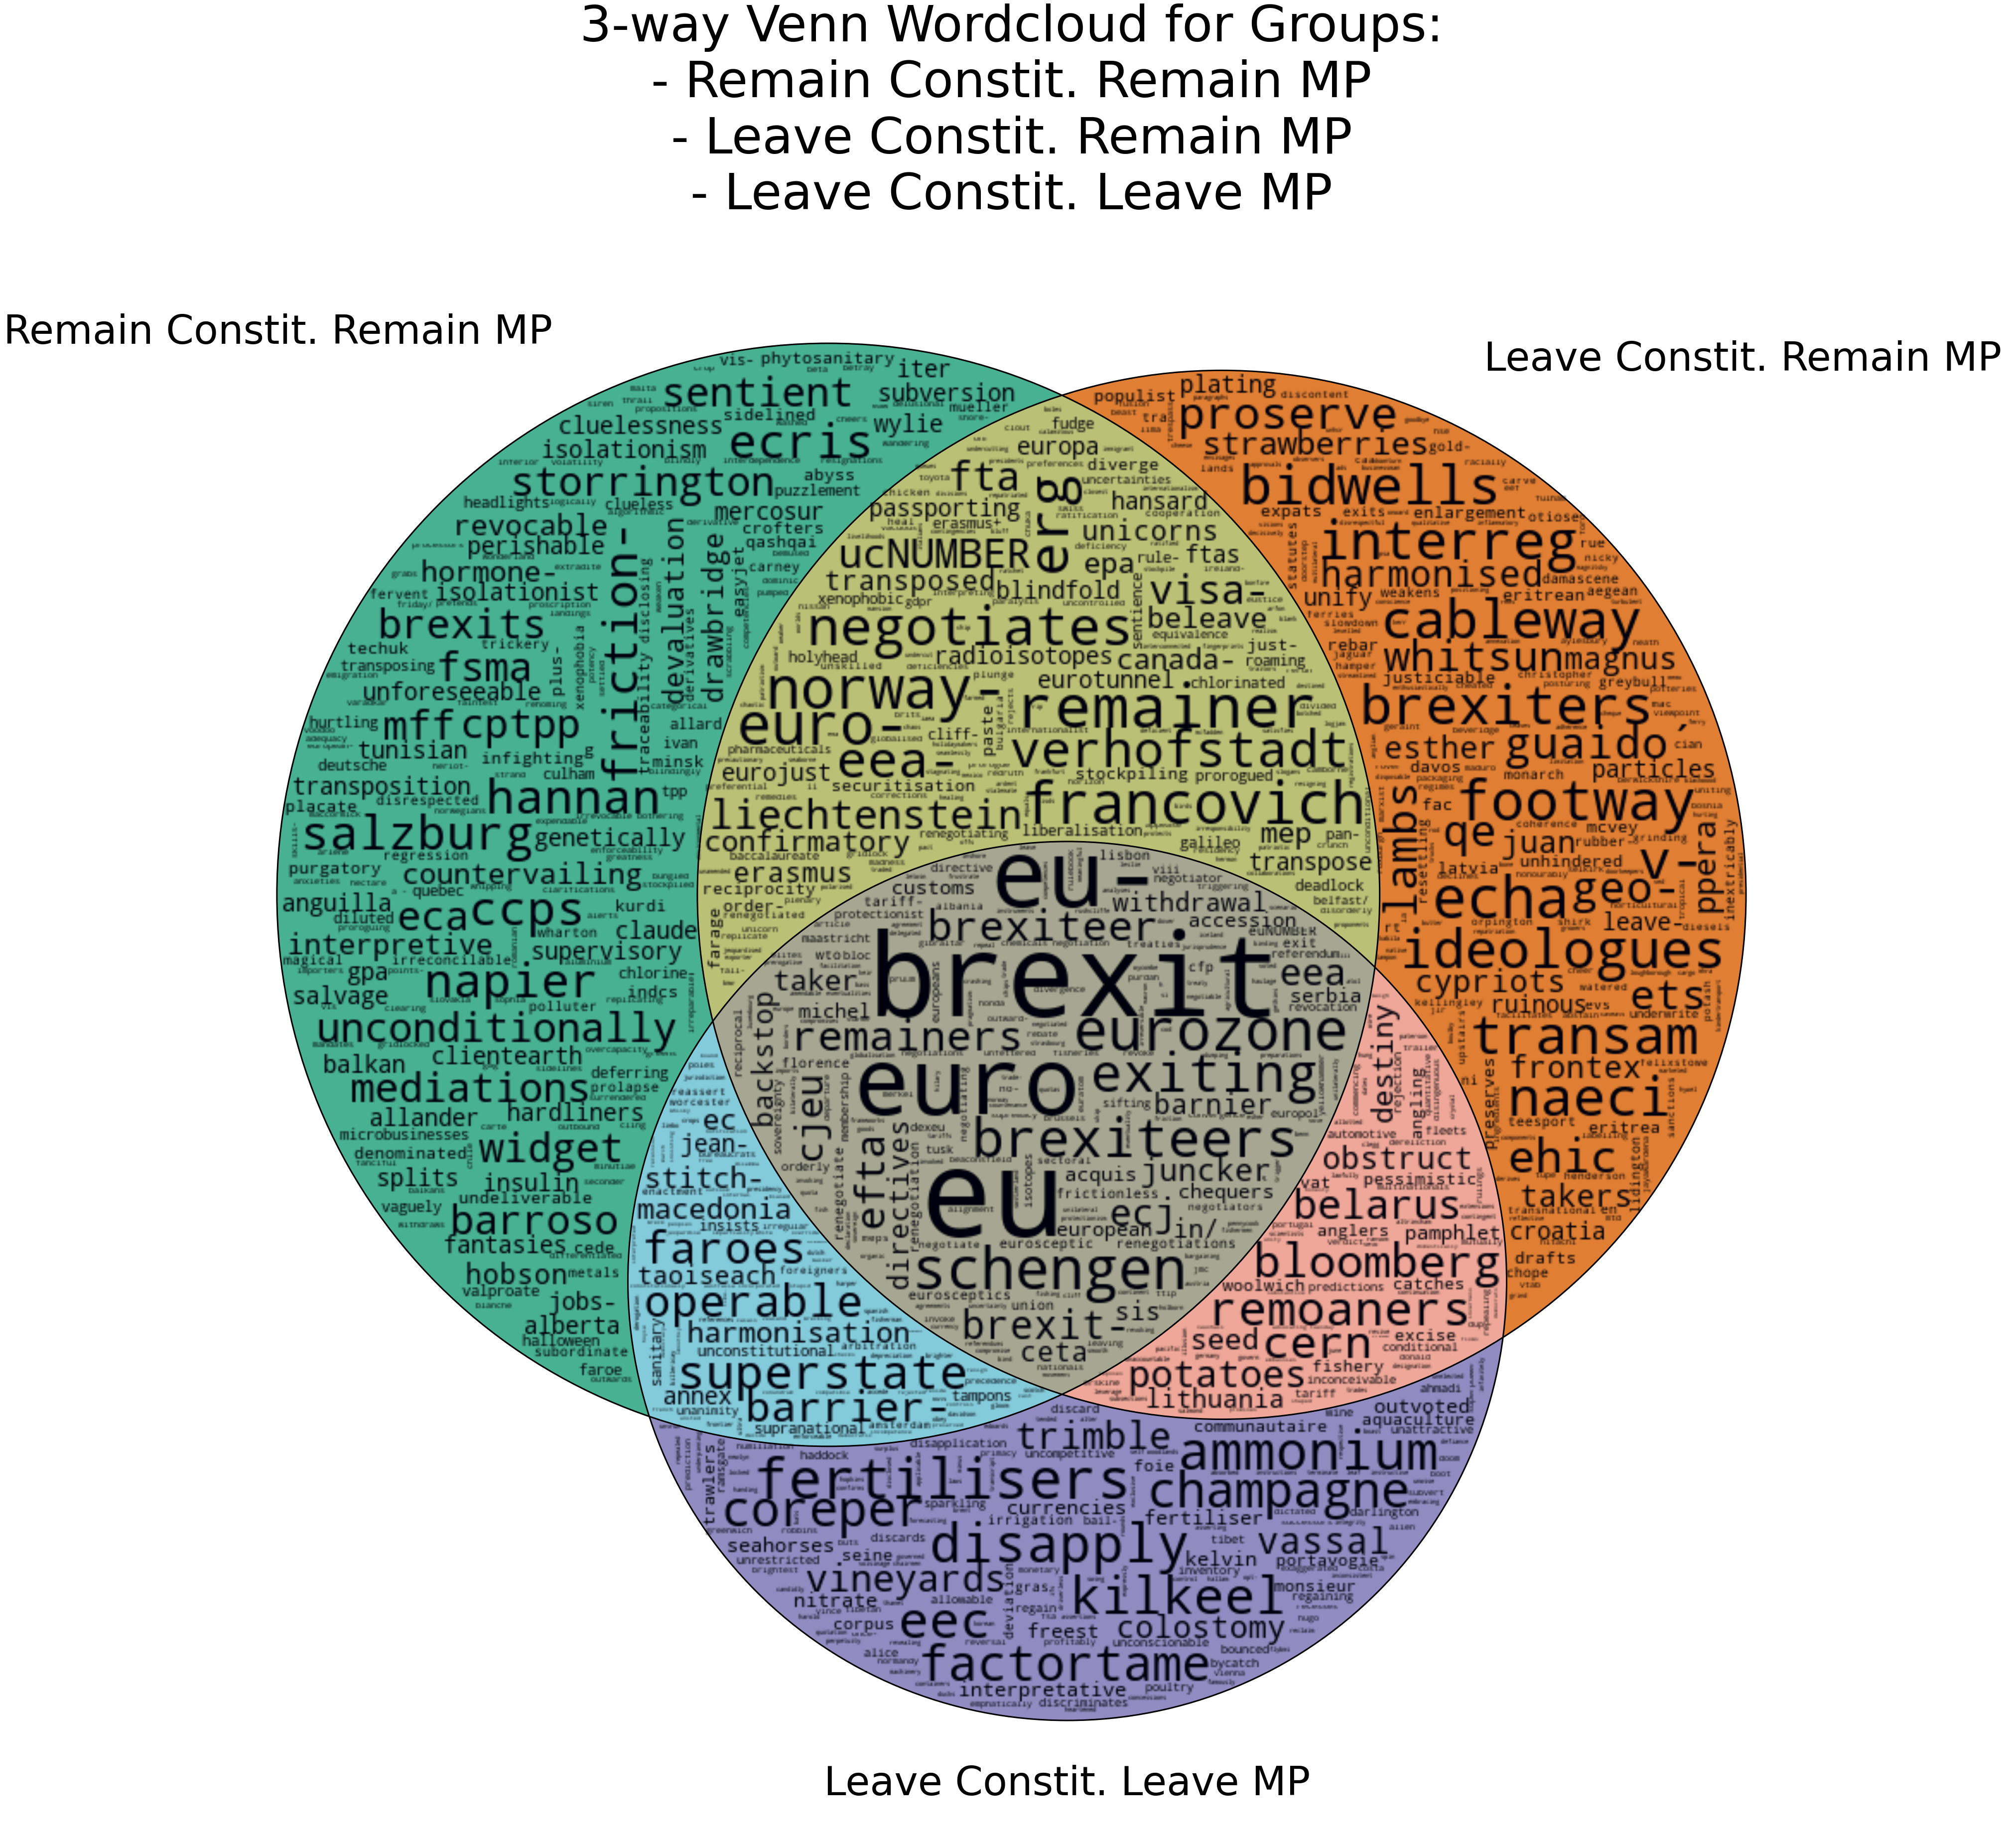

In [8]:
interest_groups = ["con-remain-mp-remain", "con-leave-mp-remain", "con-leave-mp-leave"]
g_colours = ['#1b9e77', '#d95f02', '#7570b3']
group_names = ["Remain Constit. Remain MP", "Leave Constit. Remain MP", "Leave Constit. Leave MP"]

venn_fig = draw_3way_venn_wordcloud([group_kw[n] for n in interest_groups], group_names, colours=g_colours)
# plt.tight_layout()
venn_fig.savefig(out_dir + "/thesis_venn.pdf", bbox_inches = 'tight')
plt.show()

In [9]:
def tokenise_all(df):
    cleaned = df.text.apply(clean_text)
    all_text = " ".join(cleaned)
    tokens = spacy_tokenise(all_text)
    return tokens

In [10]:
%%time
all_tokens = nltk.Text(tokenise_all(all_contributions))

Wall time: 3min 19s


In [24]:
all_tokens.concordance("drawbridge", width=100)

Displaying 25 of 53 matches:
rs that shows that we have not pulled up the drawbridge . let me again quote fabien miclet from live
m result as a vote for the uk to pull up the drawbridge . we will remain an open , tolerant country 
does not mean we are advocating pulling up a drawbridge . in certain areas , whether allowing the re
ver , but once in power , they pulled up the drawbridge and were nervous about the challenge they fa
hat does not mean that we are pulling up the drawbridge and ending all immigration . in fact , it is
er will know that , as he plans to raise the drawbridge into england through raising fees , in wales
 now , but this will not mean pulling up the drawbridge . we will operate the immigration system in 
of open- door immigration and pulling up the drawbridge , it seems to me that there is huge scope fo
 facing . now is not the time to pull up the drawbridge . now is more than ever the time to open the
, build a wall around the uk and take up the drawbridge . it f

In [12]:
all_tokens.concordance("vassal", width=100)

Displaying 25 of 32 matches:
 proud partner with european colleagues into a vassal state . will the secretary of state propose th
t rule- making and use medieval language about vassal states and all the rest of it are talking abou
this united kingdom will never , ever become a vassal state ? will she also confirm that if naked se
ped in the backstop forever , or of becoming a vassal state or even , absurdly , a colony , are over
of the united kingdom and kept as some kind of vassal state or annexe by the eu — we would not even 
p said of the agreement : “ we will become a ‘ vassal state ’ many of whose laws will have been crea
nder the suzerainty of the ecj . we would be a vassal state . this country has never bowed the knee 
escribed as if it will mean we are a permanent vassal state . campaigners on both sides exacerbate d
. this is not part of a plot to turn us into a vassal state . the eu did not want us to leave , but 
itizens ’ rights , that does not leave us as a vassal state , 

In [13]:
all_tokens.concordance("superstate", width=100)

Displaying 25 of 40 matches:
ion for scotland , but want to sell out to a superstate european union . i have never understood how
ndependence with wanting to be shackled to a superstate in which they would have but a pimple of inf
vernments . it is very far away from being a superstate .   on a point of order , madam deputy speak
we will save when we are not in the european superstate , and i welcome the half a billion pounds a 
pooled sovereignty and the fear of a federal superstate , but many others registered their protest a
some great liberation or removal of an alien superstate that oppresses them and over- regulates them
ieved in ever closer union or in a political superstate . that is not what we want . i want to give 
on , britain can never be part of a european superstate . the council also agreed that ever closer u
ot want the euro , they do not want the euro superstate and they do not want something for nothing i
vantages of coming out of the european union superstate in jus

In [14]:
%%time
eu_tokens = nltk.Text(tokenise_all(eu_mentions))

Wall time: 33.7 s


In [15]:
eu_tokens.concordance("brextremists", width=100)

Displaying 11 of 11 matches:
 because she had decided to kow- tow to the brextremists in her own party , a hard brexit to get thr
ort of almost nobody . she is saying to the brextremists that they need to vote for her deal otherwi
s conundrum was to appease the unappeasable brextremists in her own party . it is hard to see whethe
. i am sure that the government toadies and brextremists on the back benches are going to repeat ad 
prime minister decided to kowtow to her own brextremists rather than reach out . she tried to exclud
is house , rather than kowtowing to her own brextremists .   in answer to my hon . friend the member
government who seem incapable of taming the brextremists , whose reckless , hard brexit would devast
onal interest . some of the extremists — or brextremists — on the conservative benches advance the s
urrent trajectory of this government , with brextremists at their core , means that we are heading f
d not just by the minister but by the other brextremists in th

In [16]:
eu_tokens.concordance("colostomy", width=100)

Displaying 25 of 25 matches:
iate date . i begin by paying tribute to the colostomy nurses at the royal shrewsbury hospital , pa
e and who encouraged me and introduced me to colostomy irrigation NUMBER years ago . i also thank c
y irrigation NUMBER years ago . i also thank colostomy nurse , julie powell , who telephoned me lat
fter hearing that i had secured the debate . colostomy nurses are special people , drawn to an ungl
interest , which derives from bowel cancer . colostomy irrigation has given me the freedom to live 
e a lot because of its close connection with colostomy irrigation . i am an ostomate — a person wit
igation . i am an ostomate — a person with a colostomy . i have owned my colostomy for almost NUMBE
 a person with a colostomy . i have owned my colostomy for almost NUMBER years , since undergoing a
ancerous tumour in NUMBER . i did not want a colostomy , but the alternative at the time was a far 
n much interest in — so i now use the term “ colostomy irrigation ” whi

In [17]:
eu_tokens.concordance("pro-european", width=100)

no matches


In [18]:
eu_tokens.concordance("remoaners", width=100)

Displaying 25 of 28 matches:
fed in .   we have here some london- centric remoaners — that could be a way of describing the shad
nd to talk about “ democracy deniers ” and “ remoaners ” one headline yesterday read “ forty pro- e
roposed labour ’ s motion is that we are all remoaners who are using parliamentary tricks to obstru
england chamber of commerce — not a bunch of remoaners — say that more than half its members believ
cle in that looked forward to the purging of remoaners in the conservative party . that was disgrac
 prepared for it in the first place . if the remoaners had the guts , they would have brought forwa
im to hold the line and not to listen to the remoaners who have become reversers who would sell our
s committee .   is it not fallacious for the remoaners to always say that once we have left the eur
y to question almost anything we were called remoaners . it is supremely ironic that it is because 
 about brexit have been unfairly attacked as remoaners when we simply w

In [19]:
eu_tokens.concordance("obstruct", width=100)

Displaying 25 of 34 matches:
 not about obstructing brexit . if we want to obstruct brexit , there are plenty of other ways to do
 be in the national interest , if we tried to obstruct the decision that the electorate so clearly m
 along with the notion that they would merely obstruct the process . once we commence this process ,
 europeans cried parliamentary sovereignty to obstruct the will of the british people , as law after
s are all such flotsam and jetsam designed to obstruct the will of the british people — is to implem
 the uk , would not expect their mp to try to obstruct the result of a democratic process just becau
it could be used here . there is no reason to obstruct the will of most welsh labour members , and c
hat chechen authorities will do everything to obstruct the federal investigation into the allegation
cessary , including against those who seek to obstruct the democratic aspirations of the congolese p
moaners who are using parliamentary tricks to obstruct the pro